In [2]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300) 

In [4]:
library("palmerpenguins")

In [5]:
penguins %>% head

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [6]:
df_counts = penguins %>%
    drop_na() %>%
    group_by(species, sex) %>%
    count()

df_counts

species,sex,n
<fct>,<fct>,<int>
Adelie,female,73
Adelie,male,73
Chinstrap,female,34
Chinstrap,male,34
Gentoo,female,58
Gentoo,male,61


We want to visualize the number of each sex within each species?

- What kind of plot? (bars?, points? other?)
- What are the axes?
- What other encodings could we try?

<img src="count_sex_by_species.png" style="width: 600px;" />

We want to visualize the number of each sex within each species?

- What kind of plot? Bar chart
  - determines the "geom"
- What are the axes? X is "species" Y is "n" (or the count) 
  - this goes in the "aes" function
- What other encodings could we try? color/group by "sex" 
  - this also goes in the "aes" function

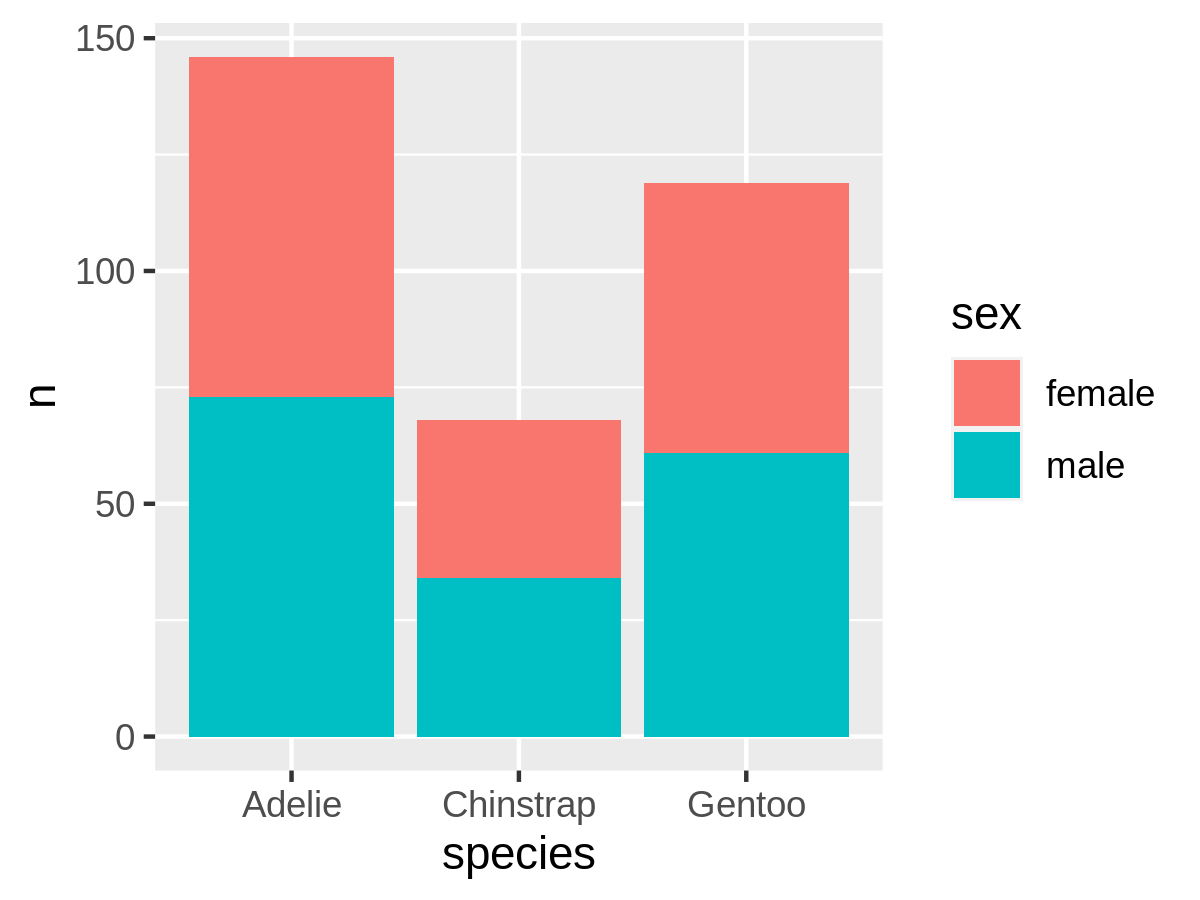

In [7]:
p = ggplot(df_counts, aes(x = species, y = n, fill = sex))

p = p + geom_col()

p

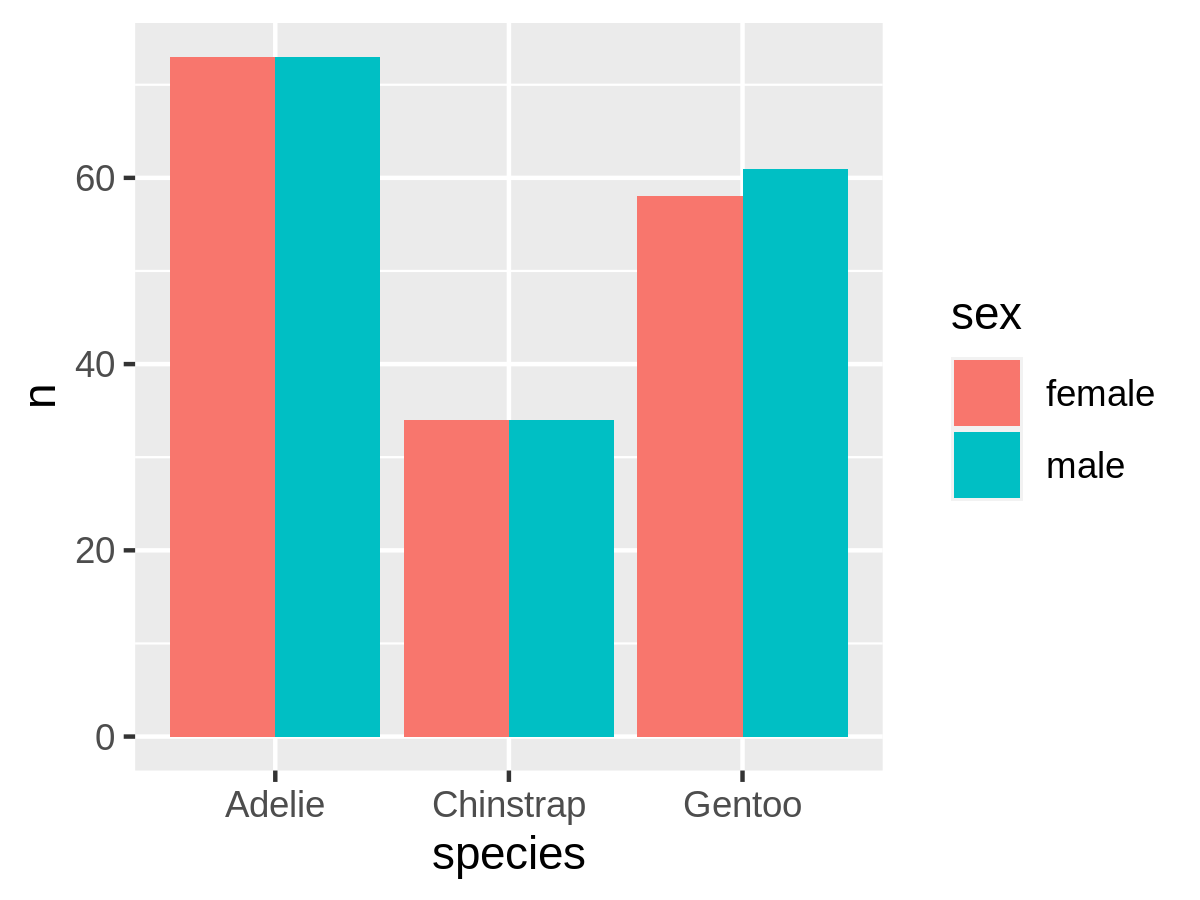

In [8]:
p = ggplot(df_counts, aes(x = species, y = n, fill = sex))

p = p + geom_col(position = "dodge")

p

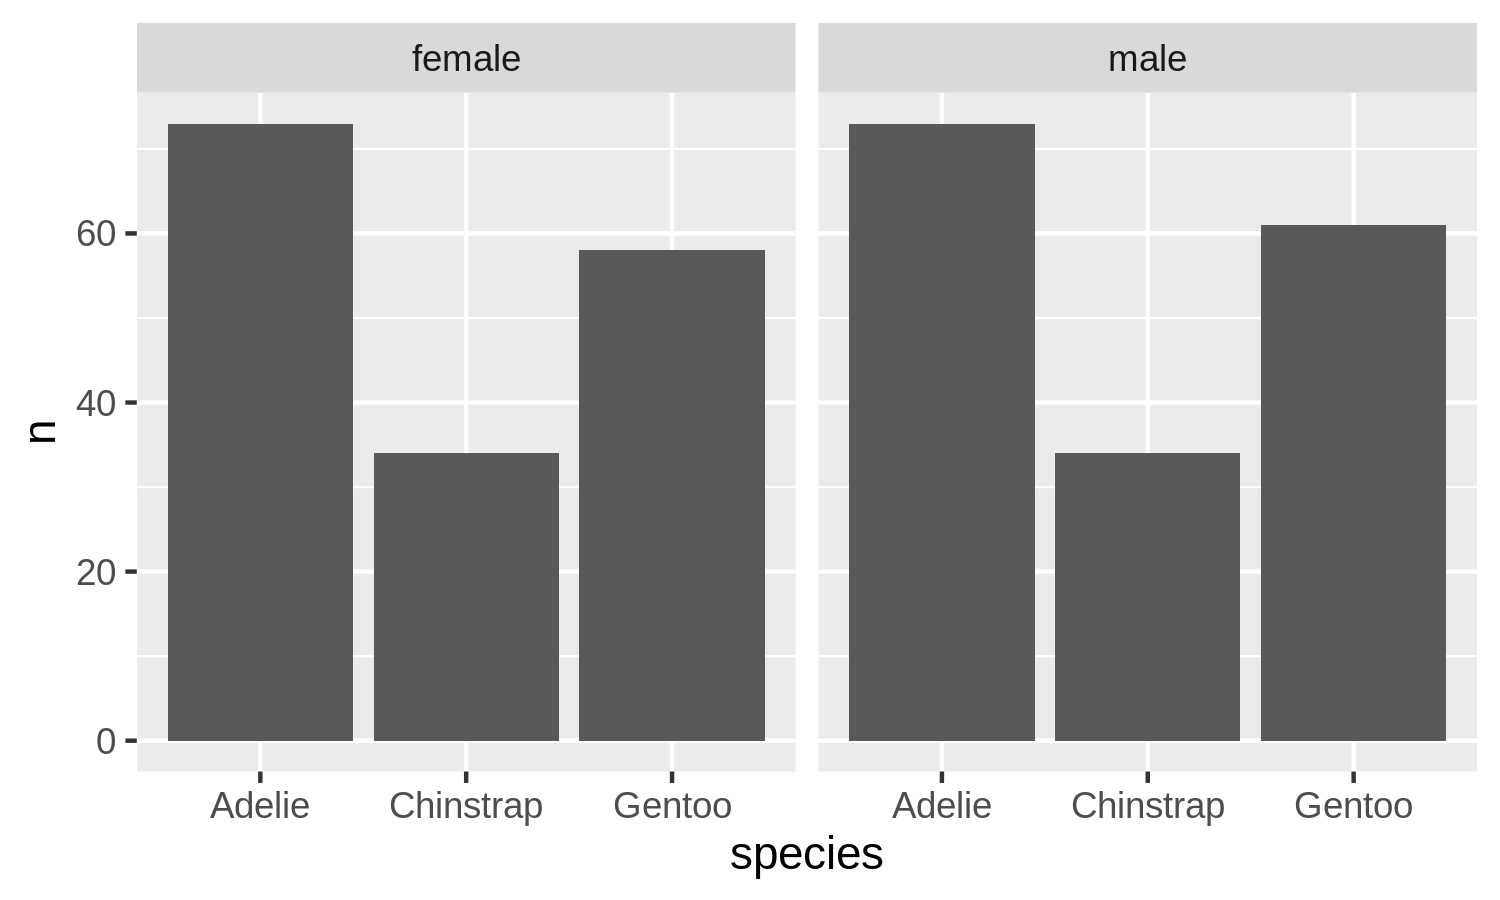

In [9]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300) 

p = ggplot(df_counts, aes(x = species, y = n))

p = p + geom_col()

p = p + facet_wrap(~sex)

p

In [22]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Warning message:
“Removed 2 rows containing missing values (geom_point).”


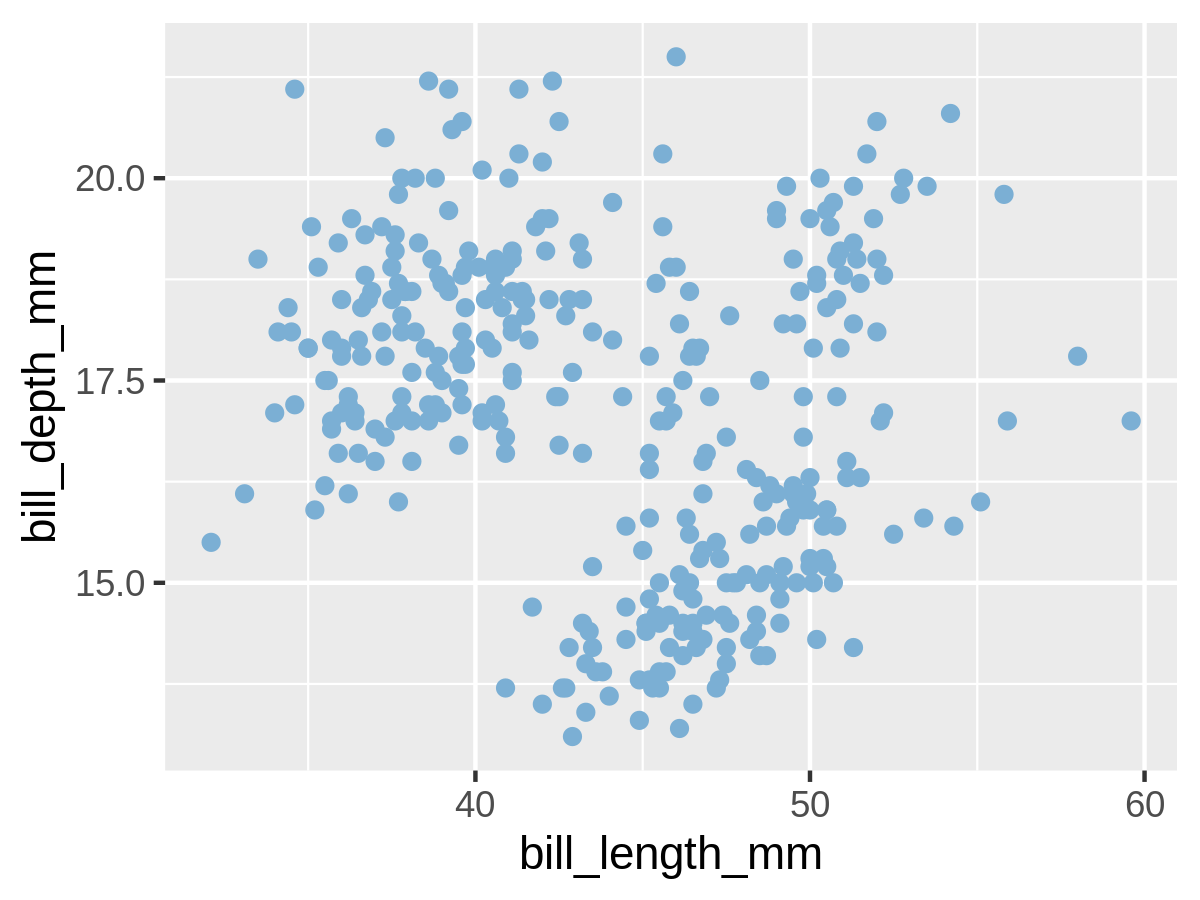

In [15]:
# geom_point
options(repr.plot.width = 4, repr.plot.height = 3) # Adjusts how the output are displayed. 
                                                   # Will persist until change it later on in the code.
                                                   # Sometimes it is better to include everytime with you code.
p = ggplot(penguins, aes(x = bill_length_mm, y=bill_depth_mm)) +
    geom_point(color = "#7BAFD4")

p

Warning message:
“Removed 2 rows containing missing values (geom_point).”


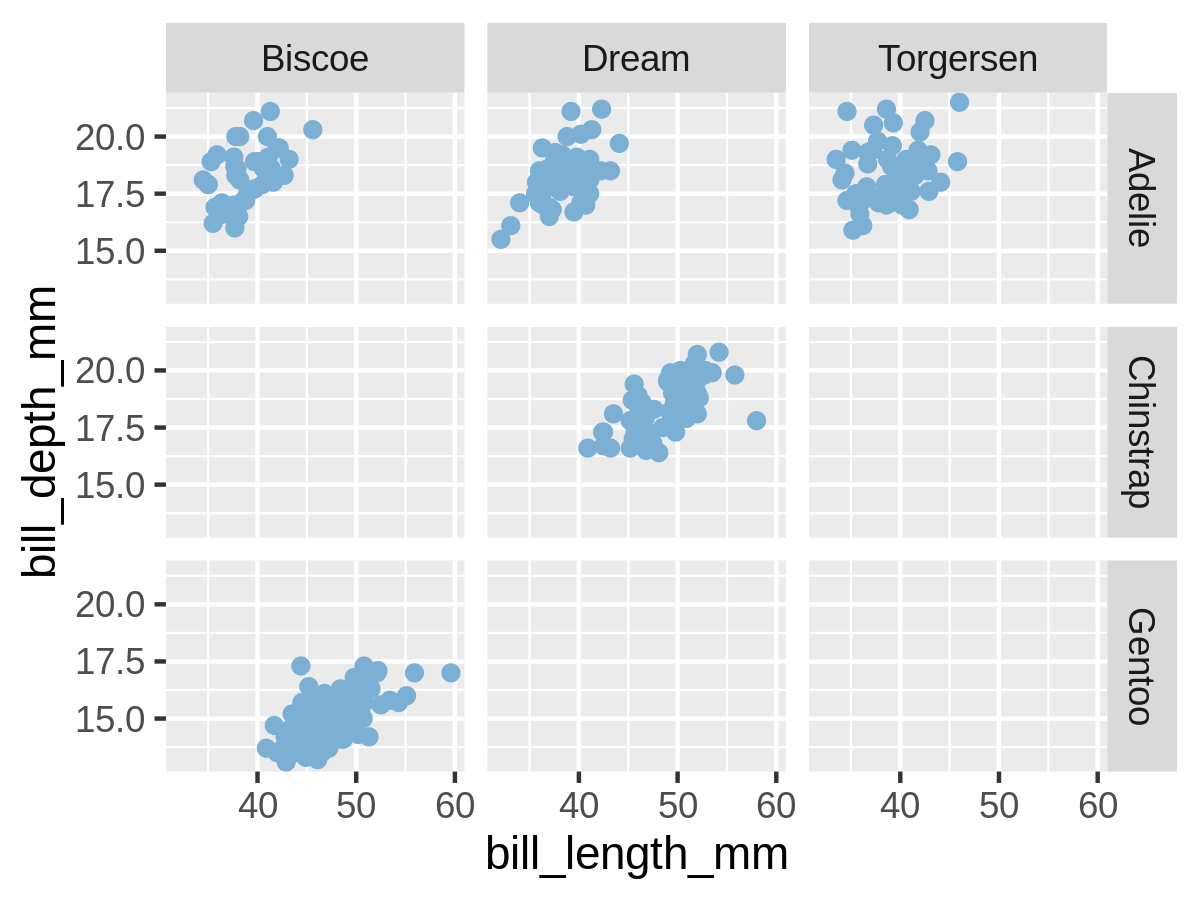

In [19]:
# There is also a facet_grid
options(repr.plot.width = 4, repr.plot.height = 3) # Adjusts how the output are displayed. 
                                                   # Will persist until change it later on in the code.
                                                   # Sometimes it is better to include everytime with you code.
p = ggplot(penguins, aes(x = bill_length_mm, y=bill_depth_mm)) +
    geom_point(color = "#7BAFD4") +
    facet_grid( species ~ island ) # if you switch them, the output will be swapped.
                                   # species: rows, and island: columns. 

p

Warning message:
“Removed 2 rows containing missing values (geom_point).”


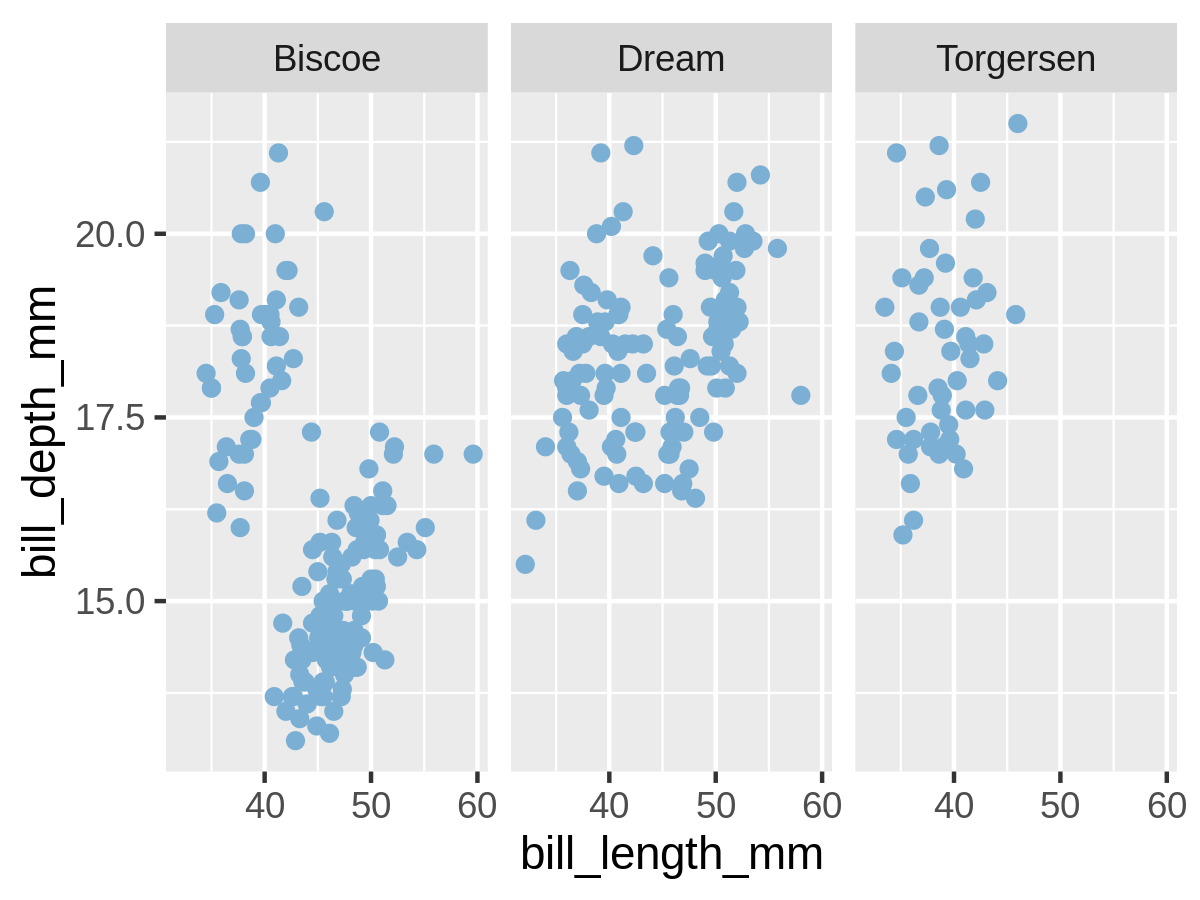

In [23]:
# There is also a facet_grid
options(repr.plot.width = 4, repr.plot.height = 3) # Adjusts how the output are displayed. 
                                                   # Will persist until change it later on in the code.
                                                   # Sometimes it is better to include everytime with you code.
p = ggplot(penguins, aes(x = bill_length_mm, y=bill_depth_mm)) +
    geom_point(color = "#7BAFD4") +
    facet_grid( . ~ island ) # a dot means all of the data.
                             # Facet wrap is a special case of facet grid, and it's usally easier to read.

p